In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# parametres
S0 = 100          # prix initial de l'action
mu = 0.05         # tendance (5%)
sigma = 0.2       # volatilite (20%)
T = 1             # 1 an (horizon)
n_steps = 252     # jours de bourse dans l'annee
n_sims = 10000    # nombre de scenarios

dt = T / n_steps  #pas de temps quotidien

# simulation
def simulate_gbm(S0, mu, sigma, T, n_steps, n_sims):
    dt = T / n_steps
    W = np.random.normal(0, np.sqrt(dt), (n_sims, n_steps))
    S = np.zeros((n_sims, n_steps + 1))
    S[:, 0] = S0

    for t in range(1, n_steps + 1):
        S[:, t] = S[:, t-1] * np.exp((mu - 0.5 * sigma**2)*dt + sigma*W[:, t-1])

    return S

S = simulate_gbm(S0, mu, sigma, T, n_steps, n_sims)



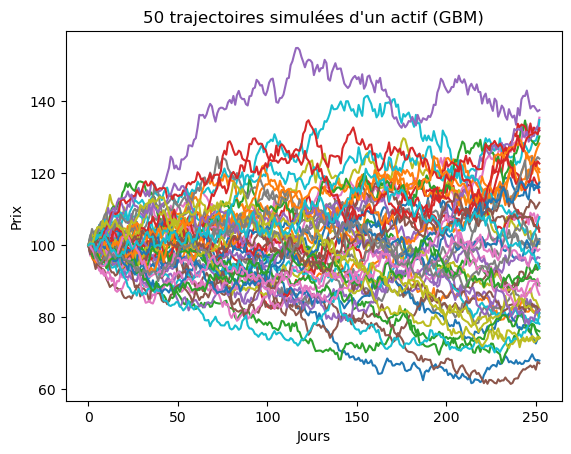

In [2]:
plt.plot(S[:50].T)
plt.title("50 trajectoires simulées d'un actif (GBM)")
plt.xlabel("Jours")
plt.ylabel("Prix")
plt.show()



In [3]:
# prix finaux des 10 000 scénarios
final_prices = S[:, -1]

# pertes (si positives = perte, si négatives = gain)
losses = S0 - final_prices

# Vérification 
final_prices[:10], losses[:10]


(array([ 67.9719923 ,  82.06053245,  74.28715619, 114.61012527,
         82.06669043,  67.23067351, 135.45556473,  80.2077773 ,
        100.8760423 , 134.80578755]),
 array([ 32.0280077 ,  17.93946755,  25.71284381, -14.61012527,
         17.93330957,  32.76932649, -35.45556473,  19.7922227 ,
         -0.8760423 , -34.80578755]))

In [4]:
#calcul VaR 95%
VaR_95 = np.percentile(losses, 95)
VaR_95


26.07484120374765

In [5]:
ES_95 = losses[losses >= VaR_95].mean()
ES_95


31.726322408797387

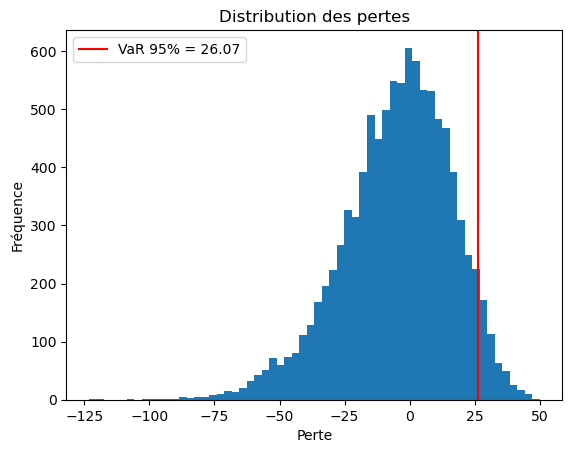

In [6]:
plt.hist(losses, bins=60)
plt.axvline(VaR_95, color='r', label=f'VaR 95% = {VaR_95:.2f}')
plt.title("Distribution des pertes")
plt.xlabel("Perte")
plt.ylabel("Fréquence")
plt.legend()
plt.show()
